# Predicting Income

This is a binary classification task to predict if income is above or below a certain threshold

The CRISP-DM system was used in this exercise.

The CRoss Industry Standard Process for Data Mining (CRISP-DM) is a process model with six phases that naturally describes the data science life cycle. It’s like a set of guardrails to help you plan, organize, and implement your data science (or machine learning) project. [Read more](https://www.datascience-pm.com/crisp-dm-2/)

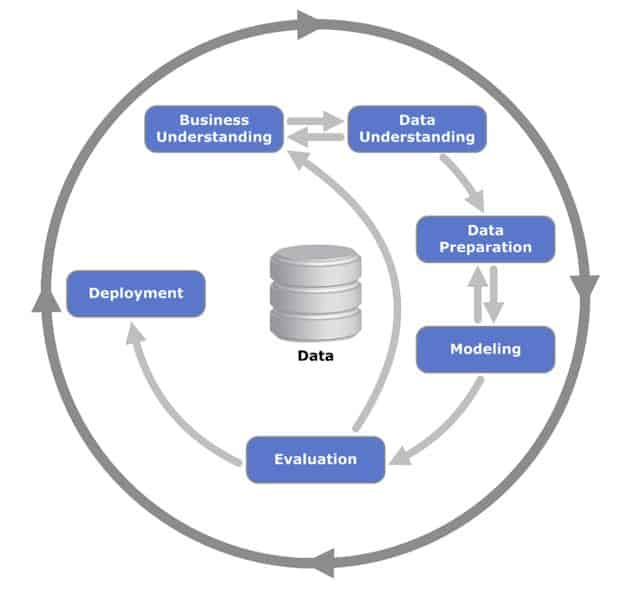

1. Business Understanding - The objective of the exercise is to predict income of a citizen (below or above $50k) depending on factors presented.
2. Data Understanding - The data provided is in a csv file containing 32561 records from a census. There are unknown values in columns such as occupation and workclass. Exploratory analysis will be carried out in the notebook below
3. Data Preparation - Unknown records were handled by labelling as 'unknown' and assigned a numerical value.
4. Modelling - 4 models will be evaluated for this classification task: logictic regression, random forest, k-nearest neighbors, decision tree. Training and test data was split 60:40.
5. Evaluation - Each of the 4 models will be compared and evaluated
6. Deployment - This was not within the scope of this exercise

## Objectives

After this module, you will learn the following:

* Handling categorical data with one-hot encoding
* Assessing feature importances
* Evaluating a model with cross validation

In [397]:
#import pandas and numpy for data manipulation
import pandas as pd
import numpy as np

#import pyplot and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import datetime for datetime manipulation 
from datetime import datetime as dt


In [398]:
#load census data into a pandas dataframe
census_data = pd.read_csv('CensusDB - CensusDB.csv')

In [399]:
#check head of the data
census_data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,Male,0,3004,60,?,>50K


### Inspect Your Data

In [400]:
#check unique values in education-num column
census_data['education-num'].unique()

array([ 9, 10,  4,  6, 16, 15, 13, 14,  7, 12, 11,  2,  3,  8,  5,  1],
      dtype=int64)

In [401]:
census_data[['education', 'education-num']].nunique()

education        16
education-num    16
dtype: int64

In [403]:
census_data[['education', 'education-num']].drop_duplicates()

,education,education-num
0,HS-grad,9
2,Some-college,10
3,7th-8th,4
6,10th,6
7,Doctorate,16
11,Prof-school,15
12,Bachelors,13
13,Masters,14
16,11th,7
18,Assoc-acdm,12


In [404]:
#check shape of the entire dataframe using .shape attribute
census_data.shape

(32561, 14)

In [405]:
#use info() method to check columns and datatypes of each column in your data frame
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


<AxesSubplot:>

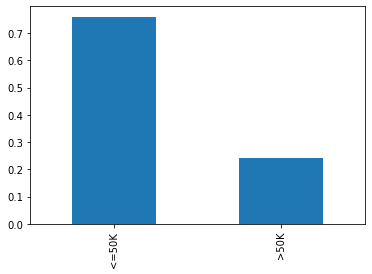

In [406]:
#TODO:
#check distribution of values in the target column. Use value_counts(normalize=True)
#plot the resulting data
census_data.income.value_counts(normalize=True).plot.bar()

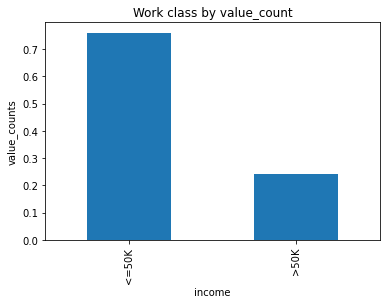

In [407]:
#check values in work class column with value_counts()

census_data.income.value_counts(normalize=True).plot.bar()
plt.xlabel('income')
plt.ylabel('value_counts')
plt.title('Work class by value_count')
plt.show()

#### TODO: visualize work class column
Do a count of each work class type using the `value_counts()` method. Visualize this using a horizontal bar plot. `.plot.barh()`

Your result should look like this:

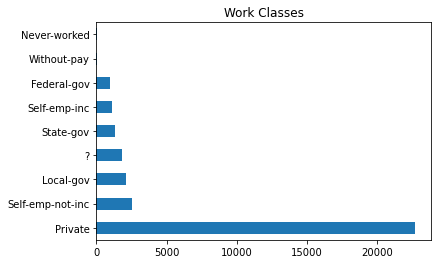

In [408]:
census_data.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

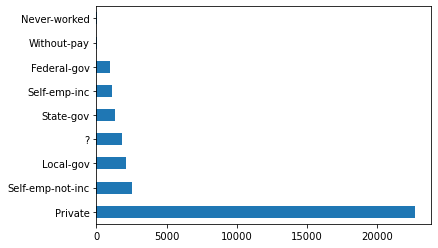

In [409]:
#Your code here
#check values in work class column with value_counts()

census_data.workclass.value_counts().plot.barh()
plt.show()

#### Check incomes by sex

We will create a 100% stacked column chart using the `crosstab()` function in pandas.

Each column will represent each sex. Within each column however, the % contribution of each income class will be colour coded.

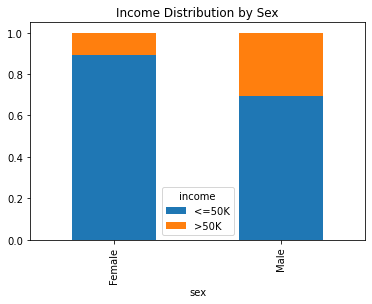

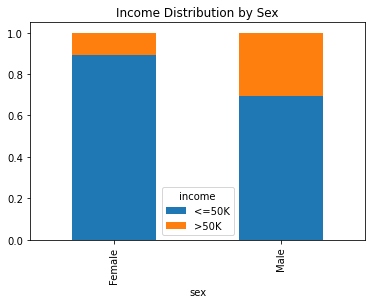

In [410]:
#create pivot of sex and income
sex_income_pivot = pd.crosstab(census_data.sex,census_data.income,normalize='index')

#plot the data
sex_income_pivot.plot.bar(stacked=True)

plt.title('Income Distribution by Sex')
plt.show()

From the image above, how do the sexes compare with income capacity?

In [411]:
#Your answer here

'''it shows that for female; 90% are earning a income of less than 50k while 10% are earning over 50k and for male; 
 70% are earning below 50k while 30% are earning an income above 50k'''

'it shows that for female; 90% are earning a income of less than 50k while 10% are earning over 50k and for male; \n 70% are earning below 50k while 30% are earning an income above 50k'

#### TODO: Check native countries represented in the data

Use a bar plot to visualize count of countries in the `native-country` column

> Your code should look like this `df[col].value_counts().plot.bar()`

<AxesSubplot:>

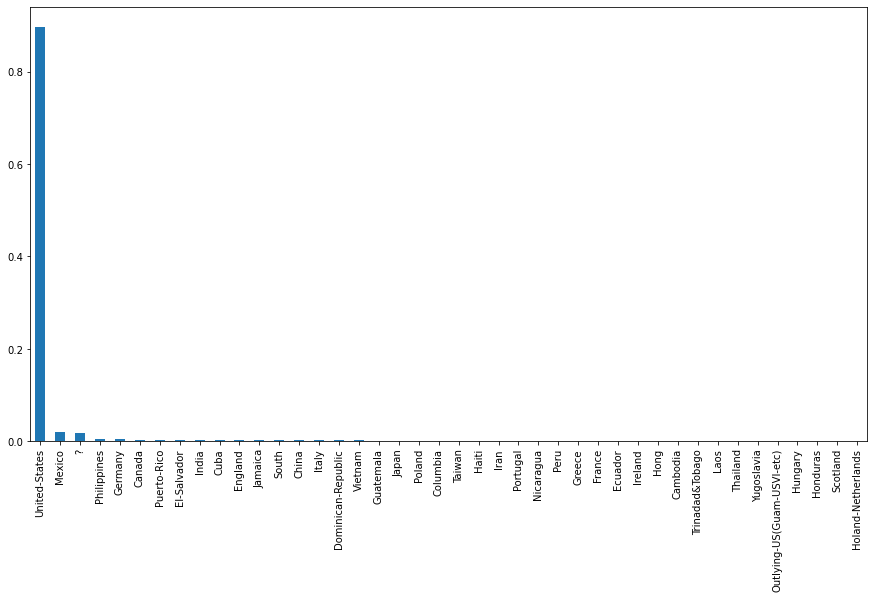

In [412]:
plt.figure(figsize=(15,8)) #this is to make the image larger

#Your code here:
census_data['native-country'].value_counts(normalize=True).plot.bar()


### Data Understanding Question:

**What effect does education have on income?**

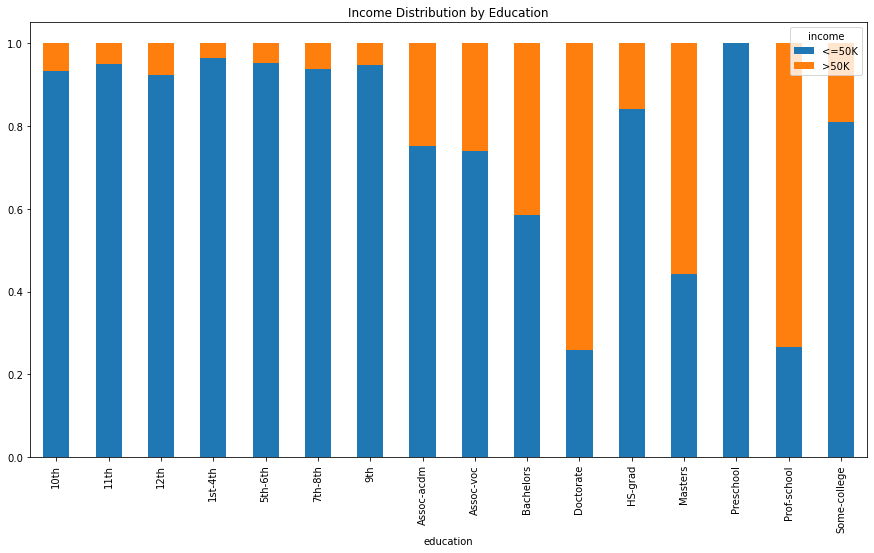

In [413]:
#create pivot of sex and income
education_income_pivot = pd.crosstab(census_data.education,census_data.income,normalize='index')

#plot the data
education_income_pivot.plot.bar(stacked=True, figsize=(15,8))

plt.title('Income Distribution by Education')
plt.show()

### Data Understanding Question: 

**What are some notable facts in the comparison between the different levels of education and earning capacity?**

In [414]:
#Your answer here:
'''it shows that 70% of Doctorate and Prof_school are earning an income greater than 50k while 70% of Assoc-acdm 
and Assoc-voc are earning below 50k'''

'it shows that 70% of Doctorate and Prof_school are earning an income greater than 50k while 70% of Assoc-acdm \nand Assoc-voc are earning below 50k'

## Feature Engineering

In this stage we prepare the data for modelling. It's all about selecting, manipulating and transforming data into features that your machine learning algorithms can work better with.

First, replace some values to something you can more easily understand

**TODO: Encode values in the data set**

* replace ? to 'Unknown'
* replace <=50k with 0
* replace >50k with 1

Do this on the entire dataframe using syntax similar to `dataframe.replace('old value','new value')`

> Check the documentation or your notes to reconfirm how to save the transformation in place, or to your value assignment to store the transformation.

In [415]:
#YOUR CODE HERE


census_data.replace('<=50K', 0, inplace = True)

census_data.replace('>50K', 1, inplace = True)

census_data.replace('?', 'Unknown', inplace = True)
census_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,Unknown,77053,HS-grad,9,Widowed,Unknown,Not-in-family,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,0
2,66,Unknown,186061,Some-college,10,Widowed,Unknown,Unmarried,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,0


### One-Hot Encoding

With one-hot encoding, we convert categorical data into numerical.

Each value of a column is pivoted into a column of it's own. The values in this new column will be either 1 or 0 to show whether that value exists or not.

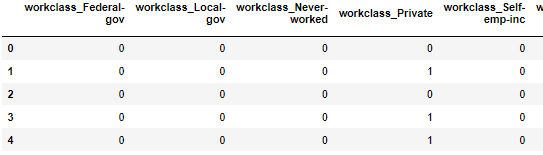

**Steps**
* First, create a list named `categorical` that contains values for 'workclass','occupation','marital-status','relationship','sex','native-country'
* Second, use `pd.get_dummies()` to one-hot encode a dataframe of the categorical values. Filter using `census_data[categorical]`. Save the encoded variables in a separate dataframe `categories_dummies`
* Third, use `pd.concat` to join the newly encoded variables into the original dataframe `census_data`.
* Finally, remove the originally unencoded categorical columns because we don't need them anymore.

In [416]:
#1. select categorical variables
#replace pass with your code

categorical = [ 'workclass','occupation','marital-status','relationship','sex','native-country']

In [417]:
#2. use pd.get_dummies() for one hot encoding
#replace pass with your code

categories_dummies = pd.get_dummies(census_data[categorical])

#view what you have done
categories_dummies.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Unknown,workclass_Without-pay,occupation_Adm-clerical,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [418]:
census_data[categorical]

,workclass,occupation,marital-status,relationship,sex,native-country
0,Unknown,Unknown,Widowed,Not-in-family,Female,United-States
1,Private,Exec-managerial,Widowed,Not-in-family,Female,United-States
2,Unknown,Unknown,Widowed,Unmarried,Female,United-States
3,Private,Machine-op-inspct,Divorced,Unmarried,Female,United-States
4,Private,Prof-specialty,Separated,Own-child,Female,United-States
...,...,...,...,...,...,...
32556,Private,Protective-serv,Never-married,Not-in-family,Male,United-States
32557,Private,Tech-support,Married-civ-spouse,Wife,Female,United-States
32558,Private,Machine-op-inspct,Married-civ-spouse,Husband,Male,United-States
32559,Private,Adm-clerical,Widowed,Unmarried,Female,United-States


In [419]:
#join the encoded variables back to the main dataframe using pd.concat()
#pass both census_data and categories_dummies as a list of their names
#pop out documentation for pd.concat() to clarify

census_data = pd.concat([census_data, categories_dummies], axis=1)

#check what you have done
print(census_data.shape)
census_data.head()

(32561, 95)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia
0,90,Unknown,77053,HS-grad,9,Widowed,Unknown,Not-in-family,Female,0,...,0,0,0,0,0,0,1,0,0,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,...,0,0,0,0,0,0,1,0,0,0
2,66,Unknown,186061,Some-college,10,Widowed,Unknown,Unmarried,Female,0,...,0,0,0,0,0,0,1,0,0,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,...,0,0,0,0,0,0,1,0,0,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,...,0,0,0,0,0,0,1,0,0,0


In [420]:
#remove the initial categorical columns now that we have encoded them
#use the list called categorical do delete all the initially selected columns at once
#replace pass in the code below

census_data = census_data.drop(categorical, axis = 1)

**TODO**:
Also drop `education` column since there's already an `education-num` column with numeric encoding for this information



In [421]:
#Your code here:


census_data.drop('education', axis = 1, inplace = True)

In [422]:
print(census_data.shape)
census_data.head()

(32561, 88)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia
0,90,77053,9,0,4356,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,82,132870,9,0,4356,18,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,66,186061,10,0,4356,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,54,140359,4,0,3900,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,41,264663,10,0,3900,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Choose your target

**TODO:**
* set y as the income column. Your code will be similar to `dataframe.income_column_name`
* set X as census data except the income column. You can use drop() to remove income when doing this assignment. Your code will be similar to `dataframe.drop(income_column_name, axis=1)`

In [423]:
#your code here:
y = census_data.income
x = census_data.drop('income', axis = 1)

### Preparing the models

In [424]:
#import the libraries we will need
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [425]:
#split into training and validation sets using a 40% split ratio
x_train,x_valid,y_train,y_valid = train_test_split(x,y,test_size=0.4)

In [426]:
# TODO: initialize logistic regression
LR = LogisticRegression()

In [427]:
#TODO: initialize k neighbors
KN = KNeighborsClassifier()

In [428]:
#TODO: initialize decision tree
DC = DecisionTreeClassifier()

In [429]:
#TODO: initialize random forest
RF = RandomForestClassifier()

In [430]:
#create list of your model names
models = [LR,KN,DC,RF]

In [450]:
def plot_confusion_matrix(y_valid,prediction):
    cm_ = confusion_matrix(y_valid,prediction)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_,
    cmap='coolwarm',
    linecolor='white',
    linewidths=1,
    annot=True,
    fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [432]:
from sklearn.metrics import confusion_matrix

In [433]:
#create function to train a model and evaluate accuracy
def trainer(model,x_train,y_train,x_valid,y_valid):
    #fit your model
    model.fit(x_train,y_train)
    #predict on the fitted model
    prediction = model.predict(x_valid)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_valid)))
    print(classification_report(prediction,y_valid)) #use this later
    plot_confusion_matrix(y_valid,prediction)


For LogisticRegression, Accuracy score is 0.7967754318618042 

              precision    recall  f1-score   support

           0       0.97      0.80      0.88     11895
           1       0.26      0.72      0.38      1130

    accuracy                           0.80     13025
   macro avg       0.61      0.76      0.63     13025
weighted avg       0.91      0.80      0.84     13025



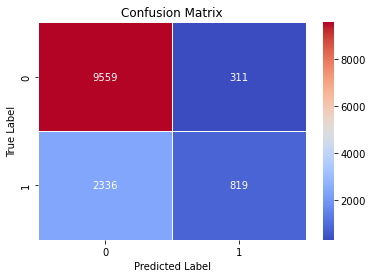


For KNeighborsClassifier, Accuracy score is 0.7777351247600768 

              precision    recall  f1-score   support

           0       0.93      0.81      0.86     11361
           1       0.30      0.58      0.40      1664

    accuracy                           0.78     13025
   macro avg       0.62      0.69      0.63     13025
weighted avg       0.85      0.78      0.80     13025



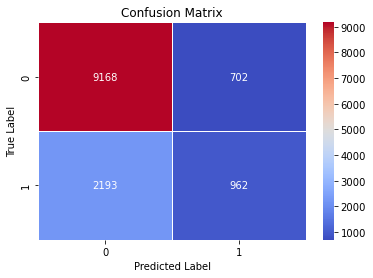


For DecisionTreeClassifier, Accuracy score is 0.8099040307101727 

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      9718
           1       0.63      0.60      0.62      3307

    accuracy                           0.81     13025
   macro avg       0.75      0.74      0.75     13025
weighted avg       0.81      0.81      0.81     13025



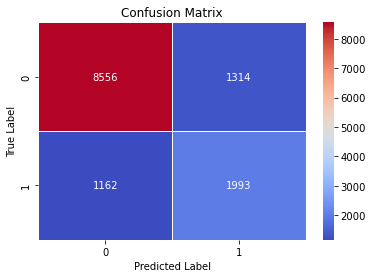


For RandomForestClassifier, Accuracy score is 0.8573512476007678 

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     10324
           1       0.63      0.74      0.68      2701

    accuracy                           0.86     13025
   macro avg       0.78      0.81      0.80     13025
weighted avg       0.87      0.86      0.86     13025



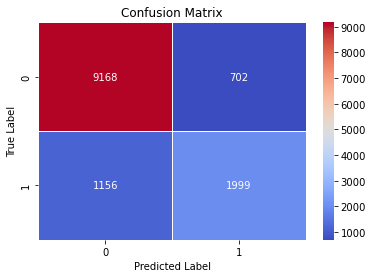

In [434]:
#loop through each model, training in the process
for model in models:
    trainer(model,x_train,y_train,x_valid,y_valid)
    

### Inspect Feature Importances

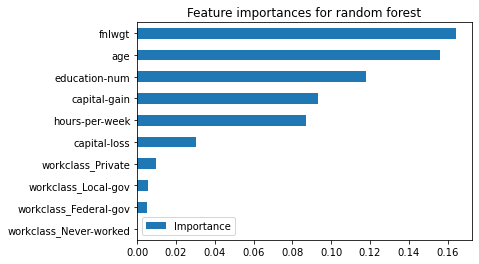

In [435]:
#get feature importances
RF_importances = pd.DataFrame(data = RF.feature_importances_,index = x_valid.columns, columns=['Importance'])

#plot top 10 feature importances, sorted
RF_importances[:10].sort_values(by='Importance').plot.barh()

plt.title('Feature importances for random forest')
plt.show()

In [436]:
#get these top 10 importances
RF_importances[:10].sort_values(by='Importance').index.values

array(['workclass_Never-worked', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private', 'capital-loss',
       'hours-per-week', 'capital-gain', 'education-num', 'age', 'fnlwgt'],
      dtype=object)

### A Bit of Feature Selection

In [437]:
#create a new X train with only 10 features
x_train2 = x_train[['fnlwgt', 'age', 'capital-gain', 'hours-per-week', 'education-num',
       'marital-status_Married-civ-spouse', 'relationship_Husband',
       'capital-loss', 'marital-status_Never-married',
       'occupation_Exec-managerial']]
x_train2.head(2)

,fnlwgt,age,capital-gain,hours-per-week,education-num,marital-status_Married-civ-spouse,relationship_Husband,capital-loss,marital-status_Never-married,occupation_Exec-managerial
30546,203783,64,0,8,9,0,0,0,0,0
9285,157069,53,0,40,12,1,1,0,0,0


In [438]:
#create a new X_valid with only 10 features so we can predict on them
x_valid2 = x_valid[['fnlwgt', 'age', 'capital-gain', 'hours-per-week', 'education-num',
       'marital-status_Married-civ-spouse', 'relationship_Husband',
       'capital-loss', 'marital-status_Never-married',
       'occupation_Exec-managerial']]

In [439]:
#train and predict
RF.fit(x_train2, y_train)
pred2 = RF.predict(x_valid2)

print(accuracy_score(pred2,y_valid))

0.8436084452975048


## Question

* What model had the best accuracy?
* What model had the least accuracy?
* Do a little research on other metrics to evaluate performance. Uncomment the classification report line in the function and try to interpret some of the other results.

In [440]:
#RandomforestClassifier model has the best accuracy
#LogisticRegression model has the least accuracy

## Evaluating with Cross Validation

In cross validation, the model splits the training data into multiple blocks. Using 1 block as test set for each training iteration, it trains the other blocks and validates against the test data.

This gives you an idea of how the model will perform when it sees new data in the real world that it hasn't seen before.

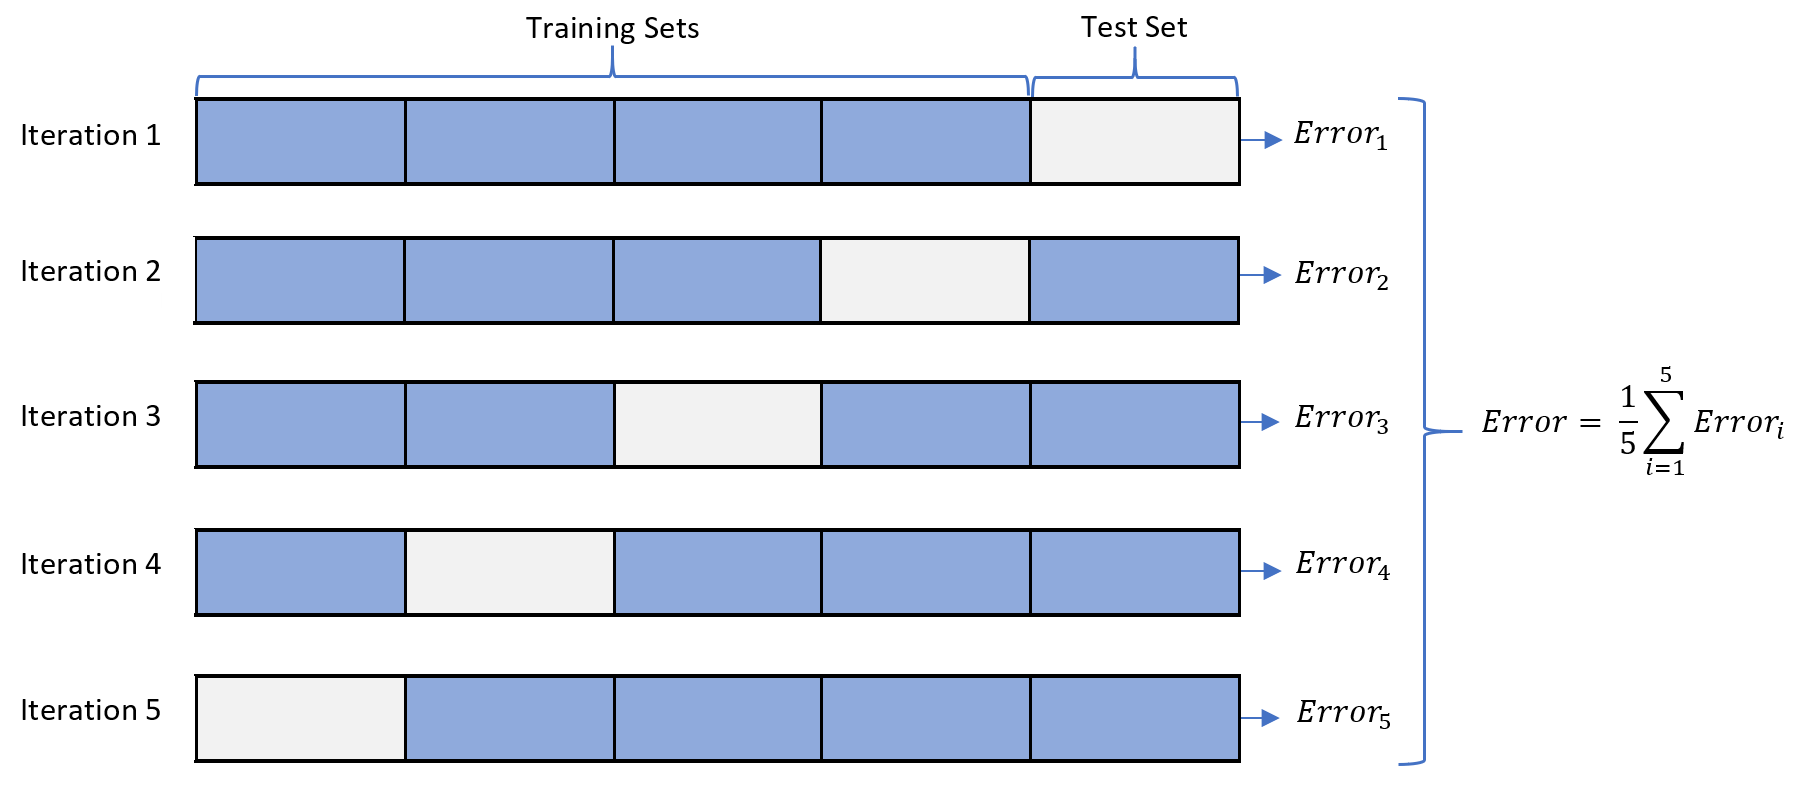

In [441]:
# evaluate your models using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)


In [442]:
#create function to train a model with cross validations and evaluate accuracy
def trainer_with_cv(model, x, y):
    '''Cross validation function. Expects a model,'''
    # evaluate model
    scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy: %.3f' % (mean(scores)))
    

In [443]:
#train and predict, looping through the list of models
for model in models:
    trainer_with_cv(model, x_train2, y_train)
    

Accuracy: 0.797
Accuracy: 0.773
Accuracy: 0.805
Accuracy: 0.846


In [444]:
#create function to train a model with cross validations and evaluate accuracy
def trainer_with_cv(model, x, y):
    '''Cross validation function. Expects a model,'''
    # evaluate model
    scores = cross_val_score(model, x, y, scoring='precision', cv=cv, n_jobs=-1)
    # report performance
    print('Precision: %.3f' % (mean(scores)))
  

In [446]:
#train and predict, looping through the list of models
for model in models:
    trainer_with_cv(model, x_train2, y_train)

Precision: 0.703
Precision: 0.551
Precision: 0.595
Precision: 0.712


In [448]:
#create function to train a model with cross validations and evaluate accuracy
def trainer_with_cv(model, x, y):
    '''Cross validation function. Expects a model,'''
    # evaluate model
    scores = cross_val_score(model, x, y, scoring='recall', cv=cv, n_jobs=-1)
    # report performance
    print('Recall: %.3f' % (mean(scores)))
  

In [449]:
#train and predict, looping through the list of models
for model in models:
    trainer_with_cv(model, x_train2, y_train)

Recall: 0.266
Recall: 0.288
Recall: 0.607
Recall: 0.606


## Question

* Does cross validation result show that your models are able to generalize to new data?

In [454]:
'''from the cross validation done, it has shown that my models are able to be generalize to a new data. it observed that 
the accuracy is approximately 80%, precision is approximately 70% and the recall is approximately 60% using 
the RandomForest Classifier model'''

'from the cross validation done, it has shown that my models are able to be generalize to a new data. it observed that \nthe accuracy is approximately 80%, precision is approximately 70% and the recall is approximately 60% using \nthe RandomForest Classifier model'